# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Examine dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Question 1: is the distribution of body temperatures normal?

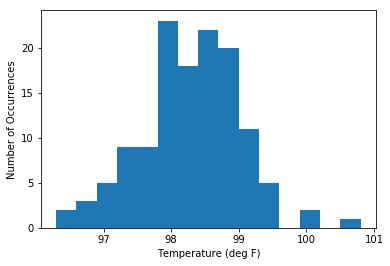

In [11]:
# First, I want to examine a histogram of the data to see if it resembles a normal distribution
import matplotlib.pyplot as plt
_ = plt.hist(df['temperature'], bins=15)
_ = plt.xlabel('Temperature (deg F)')
_ = plt.ylabel('Number of Occurrences')
plt.show()

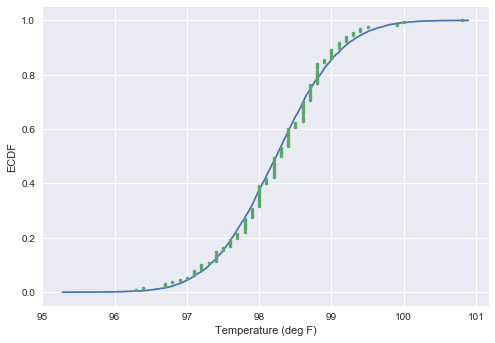

In [12]:
# The histogram looks normal, although skewed slightly left.
# I will now check the normality of this data 
# First, I will write a function to return the x and y values of an empirical cumulative distribution function
def ecdf(data):
    
    # Calculate number of datapoints: n
    n = len(data)
    
    # x data for ECDF
    x = np.sort(data)
    
    # y data for ECDF
    y = np.arange(1, n+1) / n
    
    return x, y 

# Now, I will compare the ecdf of the data against a theoretical normal distribution 
# with the same mean and standard distribution

import numpy as np 
import seaborn as sns

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

# Plot the ecdf of the data on the same plot as the theoretical ecdf 
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Temperature (deg F)')
_ = plt.ylabel('ECDF')
plt.show()


The ECDF of the data looks very similar to the ECDF of the theoretical normal distribution with the same mean and standard deviation. This suggests that  body temperatures are normally distributed. Now, I'll verify using scipy stats.

In [15]:
# Import scipy.stats to test for normality

import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In this situation, the null hypothesis is that the data are distributed normally. The p-value here is 0.25;  with a p-value this high, I cannot reject the null hypothesis, so I can proceed moving forward under the assumption that body temperature data have a normal distribution.

# Question 2: Is the sample size large? Are the observations independent?

In [13]:
# Let's explore the size of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There are 130 data points in this table. In statistics, independence means that the the probability that one event (here, a recorded temperature of X degrees)  in no way affects the probability of another event occuring (another recorded temperature of Y degrees). Taking one person's temperature does not in any way change the temperature of the next person's recorded temperature, assuming that these are measurements of 130 different people. Therefore, we can assume that the observations are independent of one another.

The sample size is large and the obserations are independent, so the CLT holds.



# Question 3: Is the true population mean really 98.6 degrees F?

#### Would you use a one-sample test or a two-sample test?
I would use a one-sample test, because there is one population mean.

#### In this situation, is it appropriate to use a t-test or a z-test?
T-scores are typically used when a sample size is less than 30 and the population standard deviation is unknown. The sample size here is greater than 130, and I know the standard deviation, so I would use a z-test statistic. 

$H_0$ : The true population mean = 98.6 degrees F

$H_1$ : The true population mean $\neq$ 98.6 degrees F

In [18]:
# Perform a z-test 

from statsmodels.stats.weightstats import ztest
print(ztest(df.temperature, value=98.6))

(-5.4548232923645195, 4.9021570141012155e-08)


This is a tiny p-value, which suggests that we should reject the null hypothesis that the population mean is really 98.6.

#### Now try using the other test. How is the result be different? Why?

In [23]:
# Try a t-test
print(stats.ttest_1samp(df.temperature,98.6))

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The resulting p-value is still still very small, but it is slightly larger than for the z-test. This difference likely stems from the fact that t-tests are made for very small sample sizes. 

# Question 4: Draw a small sample of size 10 from the data and repeat both tests.

In [25]:
# Draw a random sample

random_sample = np.random.choice(df['temperature'], size=10, replace=False)

# z test:
print(ztest(random_sample, value=98.6))

# t test:
print(stats.ttest_1samp(random_sample,98.6))

(-3.2359162297799551, 0.0012125296275160198)
Ttest_1sampResult(statistic=-3.2359162297799551, pvalue=0.010225299240111426)


#### Which one is the correct one to use?

The t-test would be the correct test to use in this instance, since the sample size is so small

#### What do you notice? What does this tell you about the difference in application of the t and z statistic?

Both p-values for the t- and z- statistic are larger in the instance of the random sample of size 10. Since the sample size is so small, the distribution is likely not as normally distributed, and the t-statistic is more appropriate.

# Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [31]:
# start by computing the margin of error and confidence interval
confidence_interval = np.percentile(df.temperature, [2.5, 97.5])
print(confidence_interval)

[ 96.7225  99.4775]


Temperatures below 96.7225 degrees Farenheight and above 99.4775 degrees Farenheight are considered 'abnormal': these temperature ranges are observed in only 5% of all measured temperatures.

# Question 6: Is there a significant difference between males and females in normal temperature?

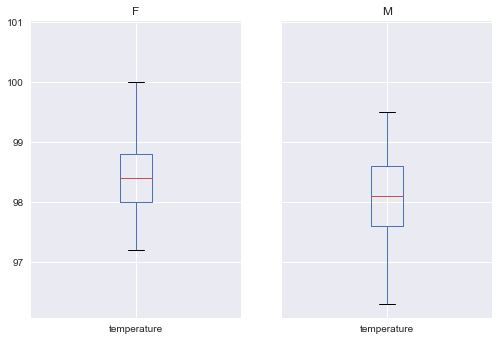

In [43]:
# Create two separate arrays, one with temperature data for females and the other with temperature data for males.
female_temperature = np.array(df.temperature[df.gender == 'F'])
male_temperature = np.array(df.temperature[df.gender == 'M'])

# Visually inspect differences between the two datasets:
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes')
plt.show()

It looks like females typically have higher temperatures than men. Let's see if this difference is statistically significant.

Hypotheses:

$H_0$ : $\mu_{female}$ - $\mu_{male}$ = 0

$H_1$ : $\mu_{female}$ - $\mu_{male}$ $\neq$ 0

Let's check to see if I should use a z-test or a t-test.

In [53]:
print(len(female_temperature))
print(len(male_temperature))

65
65


Since there more than 30 data points for both males and female temperatures, a z-test will be appropriate.

In [52]:
print(ztest(female_temperature,male_temperature, value=0))

(2.2854345381656103, 0.02228736076065755)


With a small p-value of 0.02, we can reject the null hypothesis that the mean of male and female body temperatures are the same: there is a statistically significant difference in body temperature between the sexes.

# Conclusions

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. However, in this study, I find that it is statistically unlikely that the true population mean is 98.6$^{\circ}$F. Furthermore, I find a statistically significant difference in temperature between males and females, so two separate population means (one for males and one for females) should be considered in the medical field.